In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt

from utils import PlaceFields, get_coords, get_flanks, to_tensor, gaussian_grid
from scipy.stats import multivariate_normal
from torch.optim import RMSprop
from torch.optim.lr_scheduler import ExponentialLR
from tqdm import tqdm

In [2]:
res = 400
coords = get_coords(res)
flanks = get_flanks(res + res // 10)

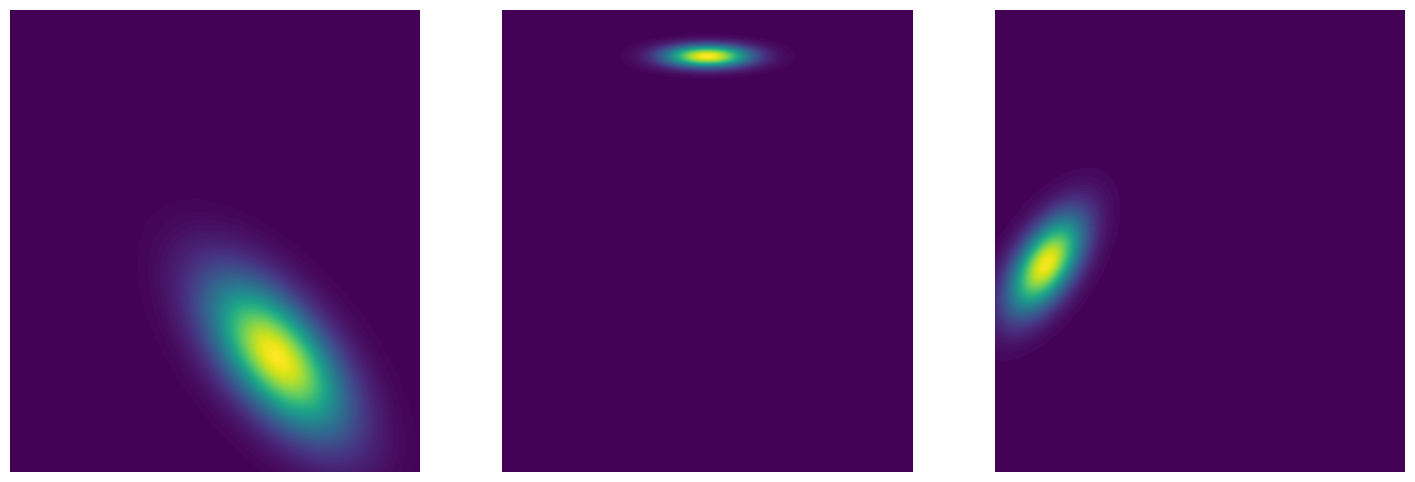

In [3]:
means = np.asarray([
    [0.3, -0.5],
    [0., 0.8],
    [-0.75, -0.1]
])
covs = np.asarray([
    [[0.05, -0.03],
     [-0.03, 0.05]],
    [[0.02, 0.],
     [0., 0.001]],
    [[0.015, 0.01],
     [0.01, 0.02]]
])


targets = [gaussian_grid(coords.cpu(), [multivariate_normal(mean=m, cov=cov)]) for m, cov in zip(means, covs)]

for ax, target in zip(plt.subplots(1, 3, figsize=(18, 6))[1], targets):
    ax.contourf(target, levels=100)
    ax.axis('off')
plt.show()

In [4]:
pfs = PlaceFields(coords, flanks, len(targets))
losses = pfs.fit(to_tensor(np.asarray(targets)))

100%|██████████████████████████████████████████████████████████████████████████████| 3000/3000 [00:30<00:00, 97.08it/s]


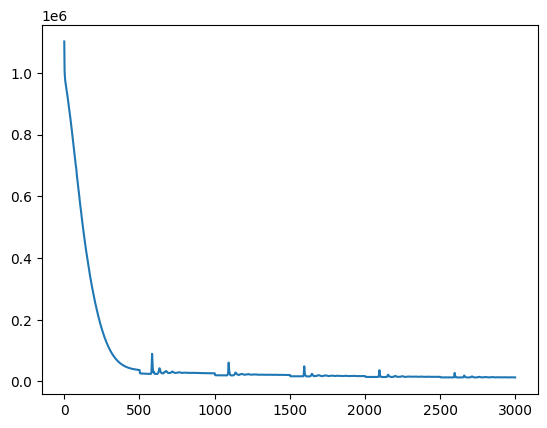

In [5]:
plt.plot(losses)

In [6]:
print("Prediction:")
print(pfs.means.data.cpu().numpy())
print("\nActual:")
print(means)

Prediction:
[[ 2.9350337e-01 -4.9373472e-01]
 [ 2.8720955e-04  7.9842633e-01]
 [-7.4811977e-01 -9.6895546e-02]]

Actual:
[[ 0.3  -0.5 ]
 [ 0.    0.8 ]
 [-0.75 -0.1 ]]


In [7]:
print("Prediction:")
print(torch.inverse(pfs.get_cov_inv()).detach().cpu().numpy())
print("\nActual:")
print(covs)

Prediction:
[[[ 4.6318699e-02 -2.3957524e-02]
  [-2.3957524e-02  4.2283628e-02]]

 [[ 2.0033186e-02 -1.9197323e-06]
  [-1.9197323e-06  1.0041505e-03]]

 [[ 1.2542940e-02  4.0933643e-03]
  [ 4.0933643e-03  1.8331531e-02]]]

Actual:
[[[ 0.05  -0.03 ]
  [-0.03   0.05 ]]

 [[ 0.02   0.   ]
  [ 0.     0.001]]

 [[ 0.015  0.01 ]
  [ 0.01   0.02 ]]]


In [8]:
print(pfs.scales.data.cpu().numpy())

[[2.0244913]
 [5.9634175]
 [3.290932 ]]


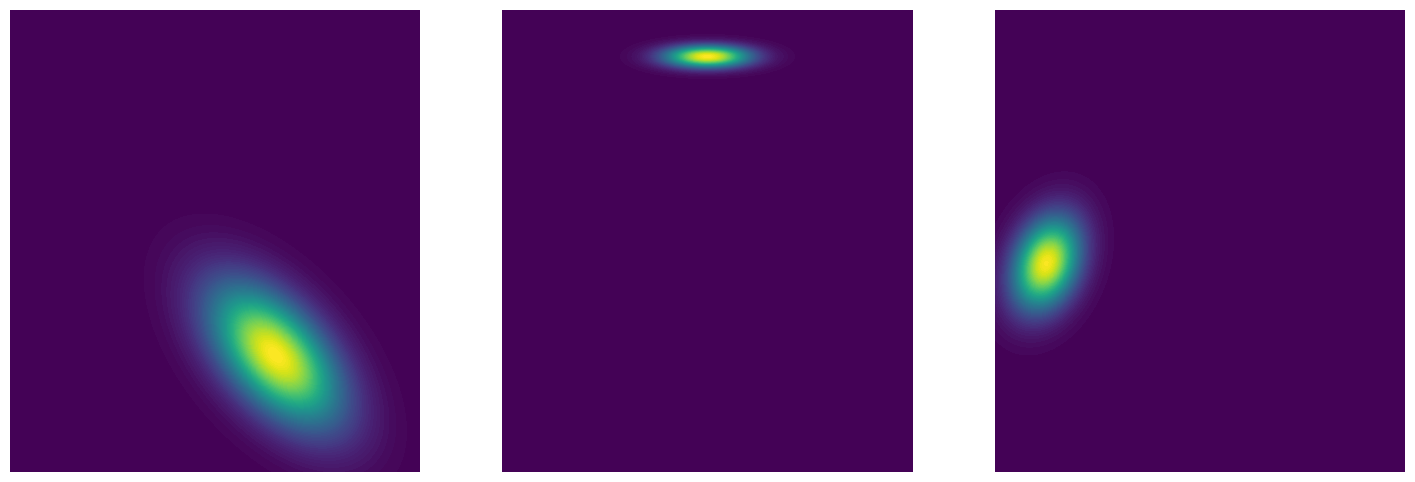

In [9]:
for ax, pred in zip(plt.subplots(1, 3, figsize=(18, 6))[1], pfs.predict().cpu().detach()):
    ax.contourf(pred, levels=100)
    ax.axis('off')
plt.show()